# 지하철 이용승객 분석 EDA

# 1. 필요한 라이브러리 가져오기

In [27]:
# 필요한 라이브러리를 불러옵니다.

import os # 폴더/파일을 관리하는 os 라이브러리
import pandas as pd
# 시각화를 위한 설정하기
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


# Google Drive 마운트
drive.mount('/content/drive')

# 파일이 저장된 Google Drive 경로 설정
drive_dir_path = '/content/drive/MyDrive/AI+X/'

# 해당 경로의 파일 목록 확인
files = os.listdir(drive_dir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. raw 파일 불러오기
- 실습을 통해 모두 통합한 파일 불러오기

In [28]:
raw = pd.read_csv('/content/drive/MyDrive/AI+X/subway_raw.csv')
display(raw)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,토,7호선,마들,6622.0,6116.0,12738.0,2019-06,06-30,20190703
107024,2019-06-30,토,4호선,노원,14071.0,14702.0,28773.0,2019-06,06-30,20190703
107025,2019-06-30,토,7호선,중계,9516.0,8981.0,18497.0,2019-06,06-30,20190703
107026,2019-06-30,토,7호선,하계,11645.0,11121.0,22766.0,2019-06,06-30,20190703


# 3. 2019.01 ~ 06  중 언제 지하철을 가장 많이 이용했는지 보려면 어떤 데이터를 이용해야할까?

- 연월별 or 월일별 데이터 분석
    - 1개월을 기준으로 잘라보자
    - 자른뒤에 승하차총 승객 수를 더해보자!

- 요일별 데이터 분석
    - 요일로 잘라보자
    - 자른뒤에 승하차총 승객 수를 더해보자!

## 3.1 연월 데이터 분석을 통해 1월 ~ 6월 중 가장 많이 이용한 달 구하기

In [29]:
# 연월로 데이터를 묶고, 묶은 상태에서 해당 달의 승하자총승객수의 총합을 더해서 구하기, 이후 reset_index()로 DataFrame  형태로 만들기
monthly_usage = raw.groupby('연월')['승하자총승객수'].sum().reset_index()
display(monthly_usage)

,연월,승하자총승객수
0,2019-01,442746389.0
1,2019-02,379836010.0
2,2019-03,466692826.0
3,2019-04,470934348.0
4,2019-05,485718557.0
5,2019-06,442210635.0


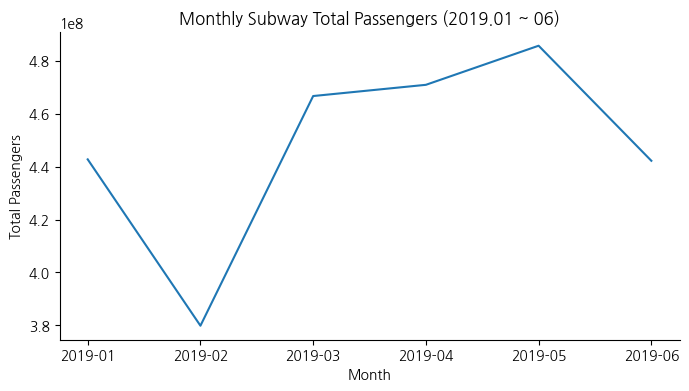

In [30]:
# @title 3.1.1  월별 이용자수 구하기_시각화

monthly_usage.plot(kind='line', x='연월', y='승하자총승객수', figsize=(8, 4), title='Monthly Subway Total Passengers (2019.01 ~ 06)', legend=False)
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

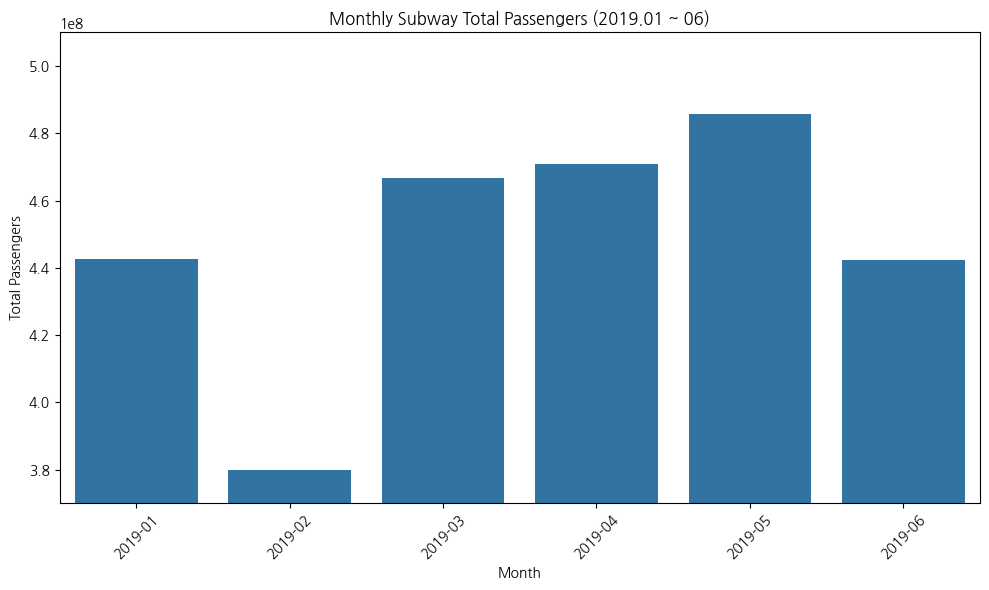

In [31]:
# @title 3.1.2 월별 이용자수 구하기_시각화

plt.figure(figsize=(10, 6))
sns.barplot(x='연월', y='승하자총승객수', data=monthly_usage)
plt.title('Monthly Subway Total Passengers (2019.01 ~ 06)')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.ylim(370000000, monthly_usage['승하자총승객수'].max() * 1.05) # Y축 범위 설정 -> 차이를 극대화 시켜주기 위해서
plt.tight_layout()
plt.show()

## 3.2 가장 많이 이용한 요일 분석하기

In [32]:
# 요일로 데이터를 묶고, 묶은 상태에서 해당 요일의 승하자총승객수의 총합을 더해서 구하기, 이후 reset_index()로 DataFrame  형태로 만들기
day_usage = raw.groupby('요일')['승하자총승객수'].sum().reset_index()
display(day_usage)

,요일,승하자총승객수
0,금,341950018.0
1,목,445310717.0
2,수,428684383.0
3,월,411979965.0
4,일,391555551.0
5,토,247523995.0
6,화,421134136.0


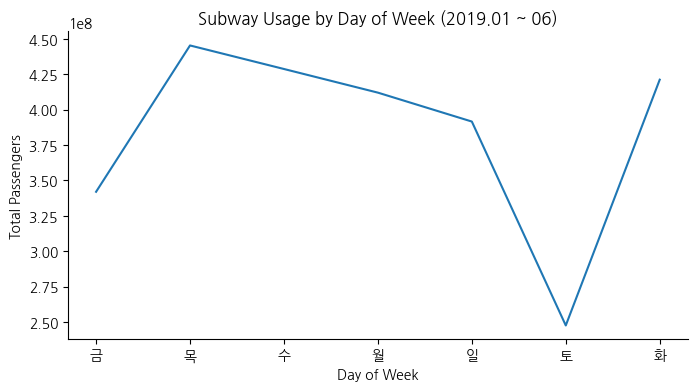

In [33]:
# @title 3.2.1 요일별 이용자수 구하기_시각화

from matplotlib import font_manager as fm
import matplotlib as mpl

fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

mpl.rcParams['font.family'] = 'NanumGothic'
day_usage.plot(kind='line', x='요일', y='승하자총승객수', figsize=(8, 4), title='Subway Usage by Day of Week (2019.01 ~ 06)', legend=False)
plt.xlabel('Day of Week')
plt.ylabel('Total Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

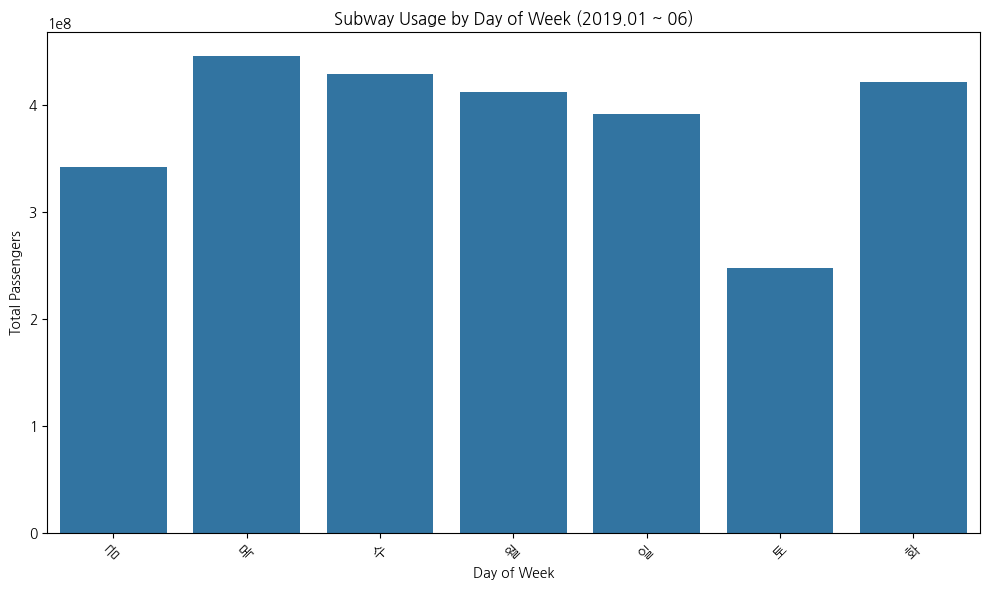

In [34]:
# @title 3.2.2 요일별 이용자수 구하기_시각화

plt.figure(figsize=(10, 6))
sns.barplot(x='요일', y='승하자총승객수', data = day_usage)
plt.title('Subway Usage by Day of Week (2019.01 ~ 06)')
plt.xlabel('Day of Week')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. 결과를 통해 가설 확인하기

- 가설) 1월 ~ 6월 중에 5월에 지하철 승객수가 많다?
    - 맞음!

- 가설) 요일(월화수목금토일) 중에 목요일 승객수가 많다?
    - 맞음!

# 5. 연월 각각에 대해 일자별 승하차총승객수 그래프 그리려면 어떤 데이터를 이용해야 할까?

- 연월로 자른 데이터에 대해서 일자별로 자르고 해당 일자에 대한 이용 승객 수 합해서 구하기

## 5.1 연월 각각에 대해 일자별 승하차총승객수 데이터 얻기

In [35]:
# raw 데이터를 연월과 월일로 그룹화하기, 이후에 각 그룹별로 '승하자총승객수'를 합산하여 하루에 얼마나 많이 사용하는 지를 월별로 나타냄!
daily_usage = (raw.groupby(['연월','월일'], as_index=False)['승하자총승객수'].sum()
                  .sort_values(['연월','월일'])) # 1월 부터 오름차순으로 보기

display(daily_usage)

,연월,월일,승하자총승객수
0,2019-01,01-01,6813453.0
1,2019-01,01-02,15214002.0
2,2019-01,01-03,15716213.0
3,2019-01,01-04,16509281.0
4,2019-01,01-05,12092335.0
...,...,...,...
176,2019-06,06-26,16561790.0
177,2019-06,06-27,16365644.0
178,2019-06,06-28,17170712.0
179,2019-06,06-29,12601537.0


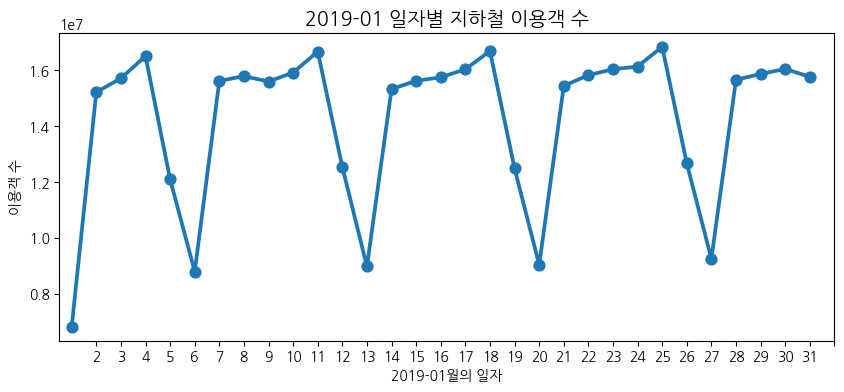

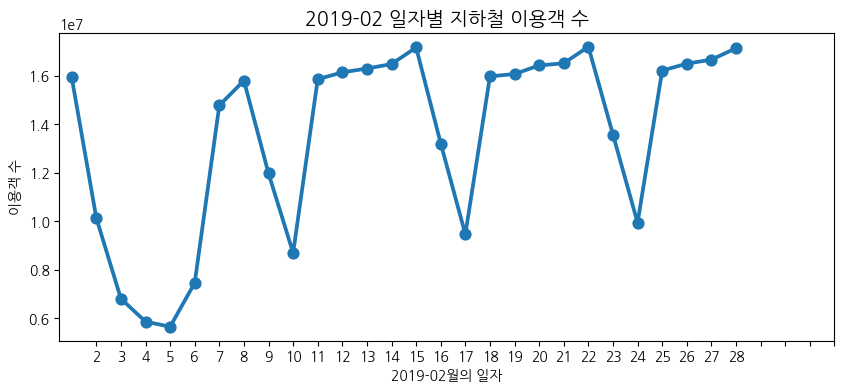

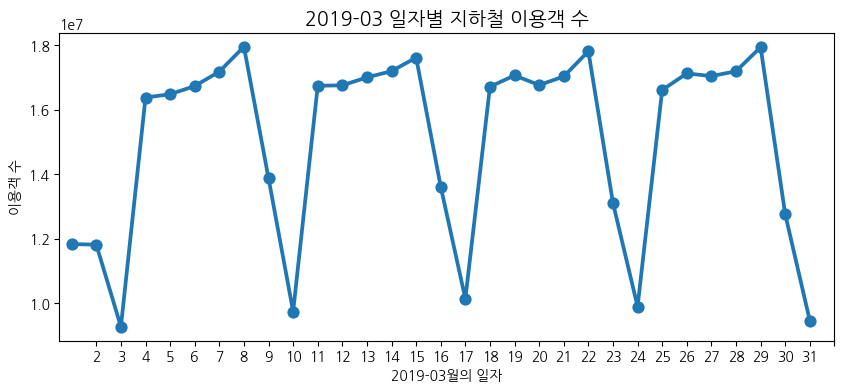

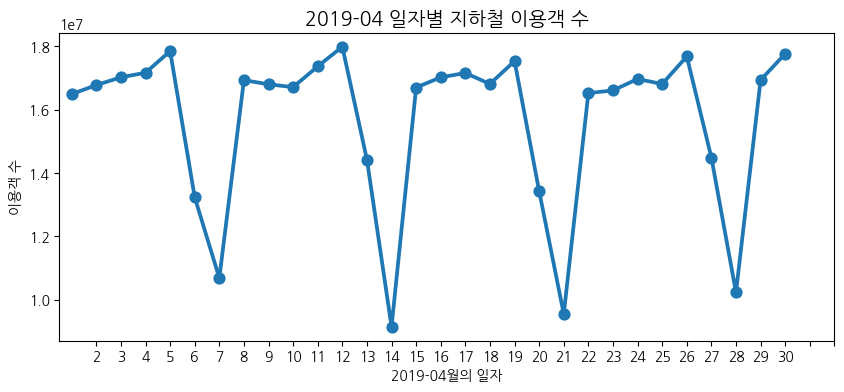

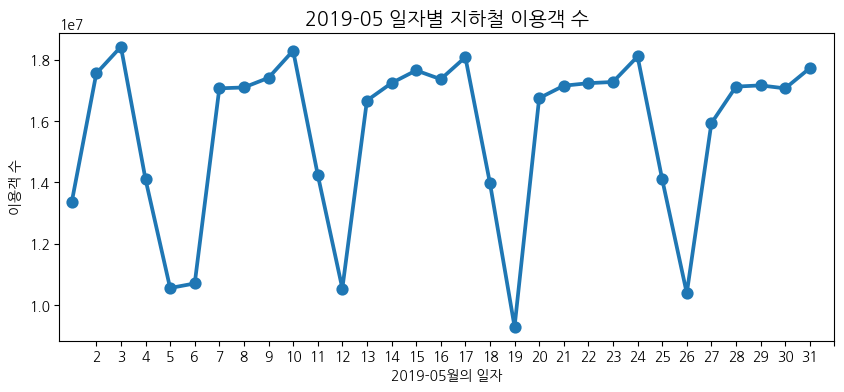

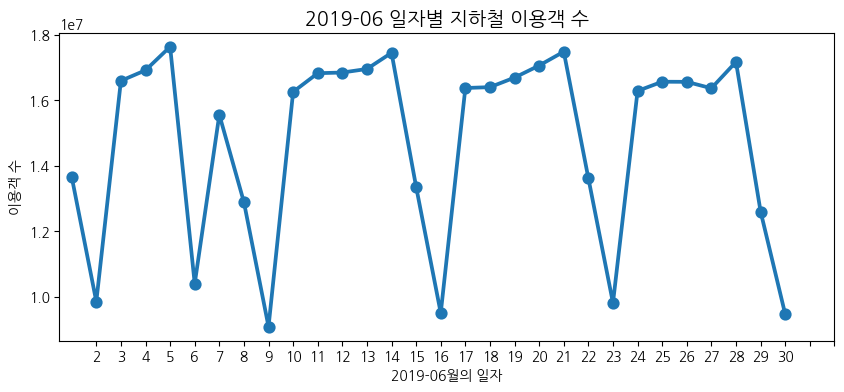

In [36]:
# @title 5.1.1 연월 각각에 대해 일자별 승하차총승객수 그래프 시각화

# 월-일 에서 일데이터만 가져와서 사용하기!
daily_usage['일'] = daily_usage['월일'].str.split('-').str[1].astype(int)

# 연월에서 unique한 값을 모아서 달만 모아주기
months = daily_usage['연월'].unique()

# months로 루프 돌기
for m in months:
    sub = daily_usage[daily_usage['연월'] == m] # 특정 월에 해당되는 데이터만 가져오기
    plt.figure(figsize=(10,4))

    # pointplot를 통한 시각화하기!
    sns.pointplot(
        data=sub, x="일", y="승하자총승객수"
    )

    plt.title(f"{m} 일자별 지하철 이용객 수", fontsize=14)
    plt.xlabel(f"{m}월의 일자")
    plt.ylabel("이용객 수")
    plt.xticks(range(1, 32))  # 무조건 31일까지 출력 되도록하기 만약 28일, 30일에서 끝난다면 빈칸으로 나오도록!
    plt.show()

# 6. 가장 승객이 많이 타는 승차역을 구하려면 어떤 데이터가 필요할까?

- raw을 보고 어떤 속성이 있었는지 확인
    - 승차총승객수 속성이 존재!
    - 가장큰 승차총승객 수를 통해서 역명 찾기!

In [37]:
# 어떤 속성이 있었는지 확인해보자!
display(raw)

# 승차총승객수를 이용하자!
# 일단 역명으로 그룹화하고, 승차총승객수로 합을 내어서 내림차순 정렬! -> 뭔가 sql로 데이터 다루는 거랑 비슷한디??
station_usage = (
    raw.groupby('역명', as_index=False)['승차총승객수'].sum()
       .sort_values('승차총승객수', ascending=False)
)

# 가장 승차 인원이 많은 역 보기 (상위 10개 보도록 하자)
display(station_usage.head(10))

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하자총승객수,연월,월일,등록일자
0,2019-01-01,월,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,월,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,월,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,월,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,월,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,토,7호선,마들,6622.0,6116.0,12738.0,2019-06,06-30,20190703
107024,2019-06-30,토,4호선,노원,14071.0,14702.0,28773.0,2019-06,06-30,20190703
107025,2019-06-30,토,7호선,중계,9516.0,8981.0,18497.0,2019-06,06-30,20190703
107026,2019-06-30,토,7호선,하계,11645.0,11121.0,22766.0,2019-06,06-30,20190703


,역명,승차총승객수
413,잠실,18574323.0
11,강남,18148024.0
33,고속터미널,17541287.0
496,홍대입구,17270084.0
247,서울역,17165598.0
214,사당,13294251.0
302,신림,12831374.0
255,선릉,11582155.0
51,구로디지털단지,11421335.0
300,신도림,11420882.0


## 6.1 가장 승객이 많이 타는 승차역 결론

- 잠실역이다!

# 7 노선별로 역별/요일별 승차승객수를 비교하려면 데이터를 어떻게 다뤄야 할까?

- 노선과 역을 그룹화하고 묶은 데이터를 요일로 나타내기

## 7.1 노선별로 역별, 요일별 승차객수를 위한 테이터 구하기

In [38]:
line = raw.groupby(['노선명', '역명','요일'], as_index=False)['승차총승객수'].sum()

display(line)
# n호선 m역 월~일 요일의 승차총승객수를 구할 수 있음!

,노선명,역명,요일,승차총승객수
0,1호선,가능,금,171506.0
1,1호선,가능,목,210822.0
2,1호선,가능,수,205504.0
3,1호선,가능,월,201352.0
4,1호선,가능,일,195014.0
...,...,...,...,...
3558,인천선,계양,수,323935.0
3559,인천선,계양,월,313081.0
3560,인천선,계양,일,300470.0
3561,인천선,계양,토,170631.0


In [39]:
# @title 7.1.1 노선별로 역별, 요일별 승차객수 비교 시각화(heatmap)

# 요일 고정 배열 만들기
weekday = ["월","화","수","목","금","토","일"]

""" Param
    line: ['노선명','역명','요일','승차총승객수'] 아까 구한 데이터 받기
    line_name: 특정 노선 / None이면 전체
    info: 셀에 숫자 표시 여부
    """
def heatmap_by_station(line, line_name=None, info=False):
    LINE = line.copy()

    # 특정 호선을 선택한 경우에는 해당 노선에 대한 데이터만 가져오기
    if line_name:
        LINE = LINE[LINE['노선명'] == line_name]

    # 요일 순서 고정하는 방법 : Categorical(범주형 데이터로 만들기) -> categories = weekday(내가 지정한 배열로 고정하기!, 기존의 문자열 오름차순 벗어나기) -> ordered=True(범주형 데이터를 순서로 다루기)
    LINE['요일'] = pd.Categorical(LINE['요일'], categories = weekday, ordered=True)

    # 역*요일 피벗 테이블(가상 테이블) 만들기
    pivot = LINE.pivot_table(
        index='역명', # 행: 역명을 행으로 두기 가장 좌측에서 어떤 역인지 알려주기
        columns='요일', # 열: 요일(월~일)을 행으로 두기
        values='승차총승객수', # 값: 행과 열이 만든 곳에 승차총승객수를 합해서 넣기, 즉 --역의 --일 승차총승객수합이 들어가는 것!
        aggfunc='sum'
    )

    plt.figure(figsize=(10, max(4, len(pivot)*0.35)))


    sns.heatmap(
        pivot, # 시각화할 데이터
        cmap="YlOrRd", # Yl -> Or -> Rd : 노 -> 주 -> 빨
        annot=info, # 셀에 데이터 표기
        fmt=".0f", # 정수형태로 제공하기
        cbar_kws={'label': '승차총승객수'} # 판단 기준 제공하기 (우측에 막대기)
    )

    # title : 특정 호선을 구하는 경우에는 몇 호선 인지 적어주기
    title = f"역별 요일에 대한 승차승객수 히트맵" + (f" · {line_name}" if line_name else "")
    plt.title(title)
    plt.xlabel("요일")
    plt.ylabel("역명")
    plt.tight_layout()
    plt.show()

# 전체 히트맵! , 수치도 같이 나오도록하기
heatmap_by_station(line,info=True)

# 1호선 부터 9호선까지
for i in range(1,10):
    heatmap_by_station(line, line_name=f"{i}호선", info=True)

Output hidden; open in https://colab.research.google.com to view.